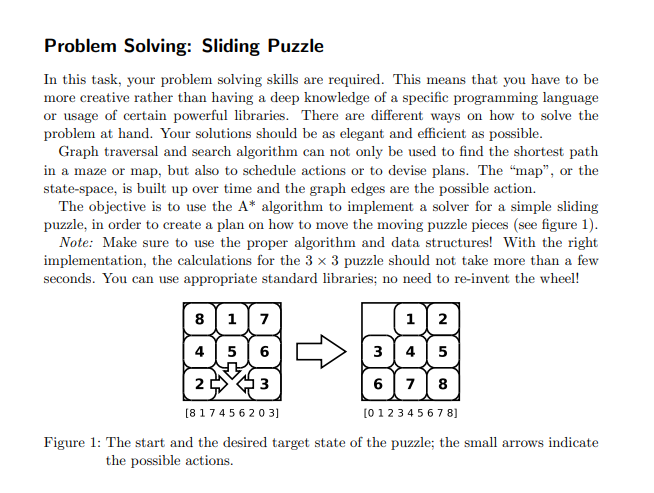

In [57]:
import heapq
import copy
import time

### Task 1
Implement the A* -algorithm for this puzzle and calculate the shortest path from
the start state [8 1 7 4 5 6 2 0 3] to the target state [0 1 2 3 4 5 6 7 8]
(see Figure 1). Come up with a suitable heuristic for the quality of the current
state. How long is the shortest path and what actions is it made up of?

In [2]:
# A*
# A suitable heuristic for this problem is the manhattan distance (in this case the distances to the desired positions)
def slidingPuzzle(board):
    # Define solved state for 3x3 puzzle
    goal = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
    
    # Manhattan distances for possible combinations
    # distances = [0] * 9
    distances = [[[0, 1, 2], [1, 2, 3], [2, 3, 4]],
                 [[1, 0, 1], [2, 1, 2], [3, 2, 3]],
                 [[2, 1, 0], [3, 2, 1], [4, 3, 2]],
                 [[1, 2, 3], [0, 1, 2], [1, 2, 3]],
                 [[2, 1, 2], [1, 0, 1], [2, 1, 2]],
                 [[3, 2, 1], [2, 1, 0], [3, 2, 1]],
                 [[2, 3, 4], [1, 2, 3], [0, 1, 2]],
                 [[3, 2, 3], [2, 1, 2], [1, 0, 1]],
                 [[4, 3, 2], [3, 2, 1], [2, 1, 0]]]

    heap = [(0, 0, board, [])] 
    closed = set()

    while heap:
        _, steps, current_board, path = heapq.heappop(heap)
        
        if current_board == goal:
            return steps, path  # Return the number of steps and the path
        
        if tuple(map(tuple, current_board)) in closed:
            continue
        
        closed.add(tuple(map(tuple, current_board)))
        
        for next_board, move in get_neighbors(current_board):
            if tuple(map(tuple, next_board)) in closed:
                continue
            heapq.heappush(heap, (steps + 1 + get_score(distances, next_board), steps + 1, next_board, path + [move]))
    
    return -1, []  # Return -1 and empty path if no solution found

def get_neighbors(board):
    res = []
    if 0 in board[0]:
        r, c = 0, board[0].index(0)
    elif 0 in board[1]:
        r, c = 1, board[1].index(0)
    else:
        r, c = 2, board[2].index(0)

    for offr, offc, move in [[0, 1, "right"], [0, -1, "left"], [1, 0, "down"], [-1, 0, "up"]]:
        if 0 <= r + offr < 3 and 0 <= c + offc < 3:
            board1 = copy.deepcopy(board)
            board1[r][c], board1[r+offr][c+offc] = board1[r+offr][c+offc], board1[r][c]
            res.append((board1, move))
    return res

def get_score(distances, board):
    score = 0
    for i in range(3):
        for j in range(3):
            score += distances[board[i][j]][i][j]
    return score

In [3]:
# start state as shown in the graphic
puzzle = [[8, 1, 7], [4, 5, 6], [2, 0, 3]]

start = time.time()
length, steps = slidingPuzzle(puzzle)
timeNeeded = (time.time() - start) * 1000

print("Shortest path:", length, "steps ->", steps)
print(f"Time needed: {timeNeeded:.2f} ms \n")

# other examples
anotherPuzzle = [[3, 2, 1], [5, 0, 4], [6, 7, 8]]
anotherPuzzle2 = [[0, 1, 2], [3, 4, 5], [7, 6, 8]]
length, _ = slidingPuzzle(anotherPuzzle)
print("Shortest path:", length)
length, _ = slidingPuzzle(anotherPuzzle2)
print("Not solvable:", length)

Shortest path: 25 steps -> ['left', 'up', 'up', 'right', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'left', 'down', 'right', 'right', 'up', 'left', 'left', 'down', 'right', 'right', 'up', 'up', 'left', 'left']
Time needed: 117.94 ms 

Shortest path: 12
Not solvable: -1


### Task 2
How many solvable states are there, i.e. states from which the goal-state can be
reached? And how long is the longest path from any unordered but solvable state to
the ordered goal-state? (Hint: You might want to use a different search algorithm
for this.)

In [4]:
# BFS
def countSolvableCombinations():
    
    goal_tuple = tuple(map(tuple, [[0, 1, 2], [3, 4, 5], [6, 7, 8]]))
    queue = [(goal_tuple, 0)]
    visited = set()
    max_path = 0

    while queue:
        current_state, steps = queue.pop(0)
        visited.add(current_state)
        max_path = max(max_path, steps)

        for next_state, _ in get_neighbors(list(map(list, current_state))):
            next_state_tuple = tuple(map(tuple, next_state))
            if next_state_tuple not in visited:
                queue.append((next_state_tuple, steps + 1))
                visited.add(next_state_tuple)
    
    return len(visited) - 1, max_path 

In [5]:
count, longest_path = countSolvableCombinations()

print("Number of solvable boards:", count)
print("Total combinations:", 9*8*7*6*5*4*3*2)

print("Longest solvable path:", longest_path)

Number of solvable boards: 181439
Total combinations: 362880
Longest solvable path: 31


##### General
There are of course a total of n! possible combinations. Of these combinations n!/2 - 1 are solvable, which is due to the matching parities (Number of misplaced pairs). As in every turn 2 numbers are switched, the puzzle needs to have an even parity.

In [56]:
# DFS can be used to get longest path to solve ANY solvable puzzle
# As this is a recursive approach it is not that fast
# Also saves board states in path instead of directions, because they are used to prevent loops
goal_state = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]

def calculateHeuristic(board):
    
    distances = [[[0, 1, 2], [1, 2, 3], [2, 3, 4]],
                 [[1, 0, 1], [2, 1, 2], [3, 2, 3]],
                 [[2, 1, 0], [3, 2, 1], [4, 3, 2]],
                 [[1, 2, 3], [0, 1, 2], [1, 2, 3]],
                 [[2, 1, 2], [1, 0, 1], [2, 1, 2]],
                 [[3, 2, 1], [2, 1, 0], [3, 2, 1]],
                 [[2, 3, 4], [1, 2, 3], [0, 1, 2]],
                 [[3, 2, 3], [2, 1, 2], [1, 0, 1]],
                 [[4, 3, 2], [3, 2, 1], [2, 1, 0]]]
    
    heuristic_value = 0
    for i in range(3):
        for j in range(3):
            tile = board[i][j]
            if tile != 0:
                heuristic_value += distances[tile - 1][i][j]
    return heuristic_value

def getLongestPath2(current_state, max_depth, depth=0, path=None):
    
    if depth > max_depth:
        return None, -1  # Reached maximum depth, backtrack

    if path is None:
        path = []

    path.append(current_state)
    
    if current_state == goal_state:
        return path, len(path) - 1  # Found a solution, return the path and length

    for neighbor_state, move in get_neighbors(current_state):
        if neighbor_state not in path:
            result, path_length = getLongestPath2(neighbor_state, max_depth, depth + 1, path)
            if result:
                return result, path_length  # Return the longest path found

    path.pop()  # Backtrack if no solution found at this depth
    return None, -1

In [55]:
#puzzle = [[8, 1, 7], [4, 5, 6], [2, 0, 3]]
anotherPuzzle = [[3, 2, 1], [5, 0, 4], [6, 7, 8]] # shortest path was 12
#anotherPuzzle2 = [[0, 1, 2], [3, 4, 5], [7, 6, 8]]

start = time.time()
longestPath, length = getLongestPath2(anotherPuzzle, 31)

timeNeeded = (time.time() - start) * 1000

print("Longest path to solve:", length, "->", longestPath)
print(f"Time needed: {timeNeeded:.2f} ms \n")

Longest path to solve: 30 -> [[[3, 2, 1], [5, 0, 4], [6, 7, 8]], [[3, 2, 1], [5, 4, 0], [6, 7, 8]], [[3, 2, 1], [5, 4, 8], [6, 7, 0]], [[3, 2, 1], [5, 4, 8], [6, 0, 7]], [[3, 2, 1], [5, 4, 8], [0, 6, 7]], [[3, 2, 1], [0, 4, 8], [5, 6, 7]], [[3, 2, 1], [4, 0, 8], [5, 6, 7]], [[3, 2, 1], [4, 8, 0], [5, 6, 7]], [[3, 2, 0], [4, 8, 1], [5, 6, 7]], [[3, 0, 2], [4, 8, 1], [5, 6, 7]], [[0, 3, 2], [4, 8, 1], [5, 6, 7]], [[4, 3, 2], [0, 8, 1], [5, 6, 7]], [[4, 3, 2], [8, 0, 1], [5, 6, 7]], [[4, 3, 2], [8, 6, 1], [5, 0, 7]], [[4, 3, 2], [8, 6, 1], [0, 5, 7]], [[4, 3, 2], [0, 6, 1], [8, 5, 7]], [[4, 3, 2], [6, 0, 1], [8, 5, 7]], [[4, 3, 2], [6, 1, 0], [8, 5, 7]], [[4, 3, 2], [6, 1, 7], [8, 5, 0]], [[4, 3, 2], [6, 1, 7], [8, 0, 5]], [[4, 3, 2], [6, 1, 7], [0, 8, 5]], [[4, 3, 2], [0, 1, 7], [6, 8, 5]], [[0, 3, 2], [4, 1, 7], [6, 8, 5]], [[3, 0, 2], [4, 1, 7], [6, 8, 5]], [[3, 1, 2], [4, 0, 7], [6, 8, 5]], [[3, 1, 2], [4, 7, 0], [6, 8, 5]], [[3, 1, 2], [4, 7, 5], [6, 8, 0]], [[3, 1, 2], [4, 7, 5], [6

### Task 3
(optional) Implement the algorithm in such a way that it can also be used for
sliding puzzles with different dimensions, or for entirely different problems.

In [44]:
# To solve puzzles of other dimensions, mainly ranges need to be changed
# This version calculates the dimensions of a given board and defines the solved state and manhattan distances based on that

def slidingPuzzle2(board):
    # get dimensions of board
    n = len(board)
    m = len(board[0])
    
    # Define solved state for n x m puzzle
    goal = []
    for i in range(n):
        row = []

        for j in range(m):
            row.append(i * m + j)

        goal.append(row)
        
    print("Solved state:", goal)
    
    
    # Pre calculate manhattan distances for n x m puzzle
    distances = [] 
    for num in range(n*m): 
        row_distances = [[abs(goal[i][j] - num) for j in range(m)] for i in range(n)]
        #row_distances = [[abs((num // m) - i) + abs((num % m) - j) for j in range(m)] for i in range(n)]
        distances.append(row_distances)
        
    print("Manhattan distances:", distances)

    heap = [(0, 0, board, [])] 
    closed = set()

    while heap:
        _, steps, current_board, path = heapq.heappop(heap)
        
        if current_board == goal:
            return steps, path
        
        if tuple(map(tuple, current_board)) in closed:
            continue
        
        closed.add(tuple(map(tuple, current_board)))
        
        for next_board, move in getNeighbors2(n, m, current_board): # include n, m
            if tuple(map(tuple, next_board)) in closed:
                continue
            heapq.heappush(heap, (steps + 1 + getScore2(n, m, distances, next_board), steps + 1, next_board, path + [move]))
    
    return -1, []  

# using n, m instead of 3, 3
def getNeighbors2(n, m, board):
    res = []
    
    for idx in range(n):
        if 0 in board[idx]:
            r, c = idx, board[idx].index(0)


    for offr, offc, move in [[0, 1, "right"], [0, -1, "left"], [1, 0, "down"], [-1, 0, "up"]]:
        if 0 <= r + offr < n and 0 <= c + offc < m:
            board1 = copy.deepcopy(board)
            board1[r][c], board1[r+offr][c+offc] = board1[r+offr][c+offc], board1[r][c]
            res.append((board1, move))
    return res

# using n, m instead of 3, 3
def getScore2(n, m, distances, board):
    score = 0
    for i in range(n):
        for j in range(m):
            score += distances[board[i][j]][i][j]
    return score

In [45]:
example1 = [[1, 2, 3, 0, 4, 5]]
example2 = [[1, 2, 3], [0, 4, 5]]
example3 = [[1, 3], [2, 4], [0, 6], [5, 7], [8, 9]]

length, _ = slidingPuzzle2(example1)
print("Shortest path:", length, "\n")

length, _ = slidingPuzzle2(example2)
print("Shortest path:", length, "\n")

length, _ = slidingPuzzle2(example3)
print("Shortest path:", length)

Solved state: [[0, 1, 2, 3, 4, 5]]
Manhattan distances: [[[0, 1, 2, 3, 4, 5]], [[1, 0, 1, 2, 3, 4]], [[2, 1, 0, 1, 2, 3]], [[3, 2, 1, 0, 1, 2]], [[4, 3, 2, 1, 0, 1]], [[5, 4, 3, 2, 1, 0]]]
Shortest path: 3 

Solved state: [[0, 1, 2], [3, 4, 5]]
Manhattan distances: [[[0, 1, 2], [3, 4, 5]], [[1, 0, 1], [2, 3, 4]], [[2, 1, 0], [1, 2, 3]], [[3, 2, 1], [0, 1, 2]], [[4, 3, 2], [1, 0, 1]], [[5, 4, 3], [2, 1, 0]]]
Shortest path: 13 

Solved state: [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
Manhattan distances: [[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]], [[1, 0], [1, 2], [3, 4], [5, 6], [7, 8]], [[2, 1], [0, 1], [2, 3], [4, 5], [6, 7]], [[3, 2], [1, 0], [1, 2], [3, 4], [5, 6]], [[4, 3], [2, 1], [0, 1], [2, 3], [4, 5]], [[5, 4], [3, 2], [1, 0], [1, 2], [3, 4]], [[6, 5], [4, 3], [2, 1], [0, 1], [2, 3]], [[7, 6], [5, 4], [3, 2], [1, 0], [1, 2]], [[8, 7], [6, 5], [4, 3], [2, 1], [0, 1]], [[9, 8], [7, 6], [5, 4], [3, 2], [1, 0]]]
Shortest path: 18
